# Python and pandas for deep learning
> Using Python and pandas for working with your files

In this notebook, we examine how one can work with files, particularly with pandas to get the data in a desired format for usage with deep learning packages.  If you're working with Google Colab without Google Drive mounted, keep in mind that you will not be able to use `glob` as one normally would.  As a workaround, we'll load the data files directly from the source.

In [ ]:
#import data science packages
import pandas as pd
import numpy as np
import seaborn as sns

#import file helper packages
import glob
import requests

In [ ]:
#colab helper 
colab=True

# Example scenario
You're working with the text of number of magazine articles, written by a number of authors, whose names are not included in the text.  The magazine articles have unique IDs, which are given by their filenames.  

You also have an accompanying CSV file with details about all of the authors, including their name, age, years of employment as a journalist, college major, and IDs corresponding to the articles that they've written.  

You're interested in learning whether their college major affects the sentiments of their articles.  The only data that you have access to is gathered on a particular day over a set of journalists and articles.  You've decided that the first crack you'll take about understanding this relationship is to separate the journalists (or articles) into groups according to their college major, and count the sentiments for all the corresponding articles for each group.

## Access data
The first thing you'll need to do is get some data, and be able to load it for processing with Python.  For this, you can generally use the `glob` package on a local computer or somewhere that you have the files mounted.  If you're local, you can follow the steps below.  Otherwise, we'll implement a quick workaround for Google Colab.

In [ ]:
filenames=[]
if colab is False:
    filenames = glob.glob('./*/*.txt')
filenames

[]

### Assemble filenames
A filename is a path to a file.  Here, we have the "directory" of the file with the list of short names of the file.  If we concatenate (add) these two parts together, we can have an entire filename for each path.  We could then use this to get the text!  Let's use a list comprehension to concatenate the strings together (e.g., using `+` between two strings).  You can use the string function `str()` to convert a numeric to a string.  

**Take a minute and try to do this on your own.**  It may help to narrate what you're trying to do to yourself.

In [ ]:
files_list = [551293, 373587, 597061, 434648, 532970,
              520668, 209035, 830014, 671125, 893941,
              479957, 541893, 836261, 244666, 696866,
              332305, 930880, 297116, 542169, 272307]
file_base = 'https://raw.githubusercontent.com/vanderbilt-data-science/python-for-deep-learning-workshop/master/workshop-files/'
if colab:
    filenames = [file_base + str(file) + '.txt' for file in files_list]
filenames

['https://raw.githubusercontent.com/vanderbilt-data-science/python-for-deep-learning-workshop/master/workshop-files/551293.txt',
 'https://raw.githubusercontent.com/vanderbilt-data-science/python-for-deep-learning-workshop/master/workshop-files/373587.txt',
 'https://raw.githubusercontent.com/vanderbilt-data-science/python-for-deep-learning-workshop/master/workshop-files/597061.txt',
 'https://raw.githubusercontent.com/vanderbilt-data-science/python-for-deep-learning-workshop/master/workshop-files/434648.txt',
 'https://raw.githubusercontent.com/vanderbilt-data-science/python-for-deep-learning-workshop/master/workshop-files/532970.txt',
 'https://raw.githubusercontent.com/vanderbilt-data-science/python-for-deep-learning-workshop/master/workshop-files/520668.txt',
 'https://raw.githubusercontent.com/vanderbilt-data-science/python-for-deep-learning-workshop/master/workshop-files/209035.txt',
 'https://raw.githubusercontent.com/vanderbilt-data-science/python-for-deep-learning-workshop/mas

### Get file contents
We're going to be using the requests package to read from a remote file (the repo on GitHub).  You can use the `requests.get(insert-url-path-here.txt)` function to get the contents of a remote url.  Let's use a list comprehension to implement this functionality.  We'll do this together!

In [ ]:
#read file contents
if colab:
    file_contents = [requests.get(fname).text for fname in filenames]
else:
    for fname in filenames:
        with open(fname, 'r') as f:
            file_contents.append(fname.read())

In [ ]:
print('Length of file contents list:', len(file_contents))
file_contents[0][:100]

Length of file contents list: 20


'The rain and wind abruptly stopped, but the sky still had the gray swirls of storms in the distance.'

### Read tabular data
Here, we'll read the tabular data stored in the csv about the authors.

In [ ]:
#concatenate file path
author_path = file_base + 'author_data.csv'
author_df = pd.read_csv(author_path)
author_df.head()

,last_name,first_name,age,years_of_journalism,college major,article_id
0,west,enrique,56,12,humanities,551293
1,braun,damien,43,13,humanities,373587
2,osborn,ellie,22,2,engineering,597061
3,vega,cierra,67,34,science,434648
4,cantrell,alden,53,23,science,532970


## Brief assessment of tabular data
Generally, you want to take a look at your data and make sure that it looks right.  We'll look at a few things below:
* How many rows and columns are in the data?
* How many null values does the data have?  (and what should I do about them?)
* Are all of the article IDs unique?
* What are the unique college majors and how many are there?
We'll investigate these below.

### How many rows and columns are there in the data?

In [ ]:
author_df.shape

(20, 6)

### How many null values does the data have?

In [ ]:
author_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   last_name            20 non-null     object
 1   first_name           20 non-null     object
 2   age                  20 non-null     int64 
 3   years_of_journalism  20 non-null     int64 
 4   college major        20 non-null     object
 5   article_id           20 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.1+ KB


### Are all of the article IDs unique?

In [ ]:
author_df['article_id'].duplicated().sum()

0

### What are the unique college majors and how many are there?

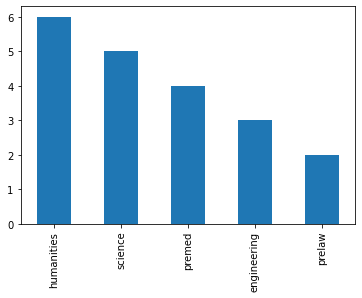

In [ ]:
author_df['college major'].unique()
author_df['college major'].value_counts()
author_df['college major'].value_counts().plot(kind='bar');

## Returning to our original problem
Now, we have the author information in a dataframe, a list of the full filenames, and a list of the corresponding text.  Consider the following scenario: we want to fine-tune a model (or directly use a model) using only "experienced" journalists with more than 5 years of experience.  How could I use these data structures to create a list of the texts corresponding ONLY to the journalists with more than 5 years of experience?
### In-class breakout discussion
In your breakout room document, identify a few ways that you could put together or use the dataframe, the list of filenames, and the list of corresponding text.  Don't write any code - just list the steps.  Remember that for all lists, you have the values of the lists and the indices.  Your filename list and your text list are collated (i.e., the index of the filename corresponds to the index of the text).

<details><summary> <u> Click here for a potential solution.  Discuss with your group first!</u> </summary>
    <pre>
        <br>Potential Solution:<br>
        #get all of the IDs for authors with more than 5 years of experience
        exp_ids = author_df.query("years_of_journalism >5")['article_id']  <br>
        #turn it into a list (exp_list)
        exp_list = exp_ids.tolist() <br>
        #turn the file_names and file_contents into a dict
        file_dict = dict(zip(files_list, file_contents)) <br>
        #select the indices
        res_text = [text for fnum, text in file_dict.items() if fnum in exp_list]
        len(res_text)
    </pre>
   </details>

### Creating dataframes from lists/dictionaries
Maybe that wasn't the easiest method in the world.  There are many other ways to handle this, depending on the size of your data and your interests.  One solution could be to add a column in your dataframe which is the actual filename.  After you've done all of your selection, you can choose to load these files iteratively.  Alternately, if your text is a reasonable size, you could put all of it together in a single dataframe.  We'll try that here.

In [ ]:
#first, create a dataframe from your filename list and your text
tinfo_df = pd.DataFrame({'filename': [fname.split('/')[-1] for fname in filenames], 'text':file_contents, 'file_id':files_list})
tinfo_df

,filename,text,file_id
0,551293.txt,"The rain and wind abruptly stopped, but the sk...",551293
1,373587.txt,She patiently waited for his number to be call...,373587
2,597061.txt,The chair sat in the corner where it had been ...,597061
3,434648.txt,The computer wouldn't start. She banged on the...,434648
4,532970.txt,Do you really listen when you are talking with...,532970
5,520668.txt,Cake or pie? I can tell a lot about you by whi...,520668
6,209035.txt,It was a concerning development that he couldn...,209035
7,830014.txt,She was in a hurry. Not the standard hurry whe...,830014
8,671125.txt,All he could think about was how it would all ...,671125
9,893941.txt,The red glint of paint sparkled under the sun....,893941


### Putting data together: joining data
Now, we can join the data together.  There are many different types of joins, but essentially a join will look for one or more key, match the key, and then bind the columns of both dataframes together where the key matches.  We'll do an outer join here, which will place NAs where there are no matches to the key value in the other table.

In [ ]:
print("Text info columns:", tinfo_df.columns.tolist())
print("Author columns:", author_df.columns.tolist())

Text info columns: ['filename', 'text', 'file_id']
Author columns: ['last_name', 'first_name', 'age', 'years_of_journalism', 'college major', 'article_id']


**What are the names of the keys in each dataframe that we want to join the tables on?**

In [ ]:
full_df = pd.merge(author_df, tinfo_df, left_on='article_id', right_on='file_id')
display(full_df.head())
print(full_df.shape)

,last_name,first_name,age,years_of_journalism,college major,article_id,filename,text,file_id
0,west,enrique,56,12,humanities,551293,551293.txt,"The rain and wind abruptly stopped, but the sk...",551293
1,braun,damien,43,13,humanities,373587,373587.txt,She patiently waited for his number to be call...,373587
2,osborn,ellie,22,2,engineering,597061,597061.txt,The chair sat in the corner where it had been ...,597061
3,vega,cierra,67,34,science,434648,434648.txt,The computer wouldn't start. She banged on the...,434648
4,cantrell,alden,53,23,science,532970,532970.txt,Do you really listen when you are talking with...,532970


(20, 9)


### Returning to the original question...
How can we filter out "inexperienced" authors, and then select only the text?

In [ ]:
full_df.query("years_of_journalism > 5")['text'].tolist()[:3]

['The rain and wind abruptly stopped, but the sky still had the gray swirls of storms in the distance. Dave knew this feeling all too well. The calm before the storm. He only had a limited amount of time before all Hell broke loose, but he stopped to admire the calmness. Maybe it would be different this time, he thought, with the knowledge deep within that it wouldnt.',
 "She patiently waited for his number to be called. She had no desire to be there, but her mom had insisted that she go. She's resisted at first, but over time she realized it was simply easier to appease her and go. Mom tended to be that way. She would keep insisting until you wore down and did what she wanted. So, here she sat, patiently waiting for her number to be called.",
 "The computer wouldn't start. She banged on the side and tried again. Nothing. She lifted it up and dropped it to the table. Still nothing. She banged her closed fist against the top. It was at this moment she saw the irony of trying to fix the 

### In-class Breakout Room Exercises
Try this yourself!  In your groups, try the following:
1. Get the filenames corresponding to authors who are younger than 55.  How many people are there?
2. How many people are older than 60 and have less than 10 years of experience?  
* Bonus. Get the list of texts for people whose college major was 'humanities'.  How many are there?

In [ ]:
#1
young_fnames = full_df.query("age < 55")['filename']
display(young_fnames)
print(len(young_fnames))

1     373587.txt
2     597061.txt
4     532970.txt
5     520668.txt
6     209035.txt
7     830014.txt
8     671125.txt
9     893941.txt
15    332305.txt
19    272307.txt
Name: filename, dtype: object

10


In [ ]:
#2
inexp_df = full_df.query("age > 60 and years_of_journalism < 10")
display(inexp_df)
print(len(inexp_df))

,last_name,first_name,age,years_of_journalism,college major,article_id,filename,text,file_id
11,lynch,angela,78,7,humanities,541893,541893.txt,Dave watched as the forest burned up on the hi...,541893
17,mclaughlin,raina,85,6,humanities,297116,297116.txt,What have you noticed today? I noticed that if...,297116


2


In [ ]:
#3
display(full_df.query("`college major`=='humanities'")['text'])
full_df.loc[full_df['college major']=='humanities', 'text']

0     The rain and wind abruptly stopped, but the sk...
1     She patiently waited for his number to be call...
5     Cake or pie? I can tell a lot about you by whi...
6     It was a concerning development that he couldn...
11    Dave watched as the forest burned up on the hi...
17    What have you noticed today? I noticed that if...
Name: text, dtype: object

0     The rain and wind abruptly stopped, but the sk...
1     She patiently waited for his number to be call...
5     Cake or pie? I can tell a lot about you by whi...
6     It was a concerning development that he couldn...
11    Dave watched as the forest burned up on the hi...
17    What have you noticed today? I noticed that if...
Name: text, dtype: object

## Modeling Results
Now that we have all of our data together and are able to extract the text of any desired subset, let's do some modeling!  Just kidding, we'll do that next week.  For now, we'll just simulate the results using the following randomized function.

In [ ]:
def sentiment_model(list_of_texts):
    '''
    Function sentiment_model: returns whether a text expresses positive or negative sentiment with confidence score
        Inputs: a list of strings which correspond to individual texts
        Returns: a list of dictionaries containing key:value pairs of 'label':'POSITIVE' or 'NEGATIVE' and 'score':float
    '''
    
    text_res = []
    
    for text in list_of_texts:
        
        single_res = {}
        
        #decide whether it is positive or negative sentiment
        if len(text) % 2 == 0:
            single_res['label'] = 'POSITIVE'
        else:
            single_res['label'] = 'NEGATIVE'
        
        #decide on confidence
        single_res['score'] = round(np.random.uniform(), 4)
        
        #append to list
        text_res.append(single_res)
  
    #return the list
    return text_res

In [ ]:
#get modeling results
sentiments = sentiment_model(full_df['text'].tolist())
sentiments

[{'label': 'POSITIVE', 'score': 0.0103},
 {'label': 'POSITIVE', 'score': 0.2547},
 {'label': 'NEGATIVE', 'score': 0.4567},
 {'label': 'POSITIVE', 'score': 0.7958},
 {'label': 'NEGATIVE', 'score': 0.4741},
 {'label': 'NEGATIVE', 'score': 0.0486},
 {'label': 'POSITIVE', 'score': 0.4984},
 {'label': 'NEGATIVE', 'score': 0.8179},
 {'label': 'POSITIVE', 'score': 0.2066},
 {'label': 'POSITIVE', 'score': 0.7544},
 {'label': 'POSITIVE', 'score': 0.0022},
 {'label': 'POSITIVE', 'score': 0.9707},
 {'label': 'POSITIVE', 'score': 0.3661},
 {'label': 'POSITIVE', 'score': 0.9482},
 {'label': 'NEGATIVE', 'score': 0.7987},
 {'label': 'NEGATIVE', 'score': 0.1664},
 {'label': 'NEGATIVE', 'score': 0.7806},
 {'label': 'POSITIVE', 'score': 0.1618},
 {'label': 'POSITIVE', 'score': 0.2951},
 {'label': 'POSITIVE', 'score': 0.7521}]

These seem like some pretty arbitrary choices for a workshop.  Are they?  Check out the HuggingFace documentation on sentiment analysis pipelines here: https://huggingface.co/transformers/quicktour.html#getting-started-on-a-task-with-a-pipeline and answer the following questions.  Make sure to add your answers to the breakout room document!
### In-class Breakout Discussion
* What is passed into the model?
* What is returned by the model?
* How does the example correspond to how one uses HuggingFace?

## How do we combine these results with the original dataframe?

In [ ]:
#create dataframe from list of dictionaries
sent_df = pd.DataFrame(sentiments)
sent_df

,label,score
0,POSITIVE,0.0103
1,POSITIVE,0.2547
2,NEGATIVE,0.4567
3,POSITIVE,0.7958
4,NEGATIVE,0.4741
5,NEGATIVE,0.0486
6,POSITIVE,0.4984
7,NEGATIVE,0.8179
8,POSITIVE,0.2066
9,POSITIVE,0.7544


In [ ]:
#concatenate dataframes
final_df = pd.concat([full_df, sent_df], axis=1)
final_df

,last_name,first_name,age,years_of_journalism,college major,article_id,filename,text,file_id,label,score
0,west,enrique,56,12,humanities,551293,551293.txt,"The rain and wind abruptly stopped, but the sk...",551293,POSITIVE,0.0103
1,braun,damien,43,13,humanities,373587,373587.txt,She patiently waited for his number to be call...,373587,POSITIVE,0.2547
2,osborn,ellie,22,2,engineering,597061,597061.txt,The chair sat in the corner where it had been ...,597061,NEGATIVE,0.4567
3,vega,cierra,67,34,science,434648,434648.txt,The computer wouldn't start. She banged on the...,434648,POSITIVE,0.7958
4,cantrell,alden,53,23,science,532970,532970.txt,Do you really listen when you are talking with...,532970,NEGATIVE,0.4741
5,gentry,kierra,25,7,humanities,520668,520668.txt,Cake or pie? I can tell a lot about you by whi...,520668,NEGATIVE,0.0486
6,cox,pierre,24,4,humanities,209035,209035.txt,It was a concerning development that he couldn...,209035,POSITIVE,0.4984
7,crane,thomas,35,9,science,830014,830014.txt,She was in a hurry. Not the standard hurry whe...,830014,NEGATIVE,0.8179
8,hill,krystal,41,31,premed,671125,671125.txt,All he could think about was how it would all ...,671125,POSITIVE,0.2066
9,cuevas,kira,39,22,premed,893941,893941.txt,The red glint of paint sparkled under the sun....,893941,POSITIVE,0.7544


## Now, let's actually answer our question!
Can we see a difference between the sentiments of articles based on college major?

<AxesSubplot:xlabel='label'>

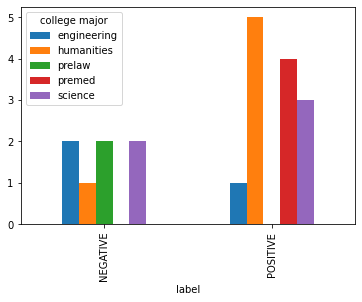

In [ ]:
final_df.groupby(['college major'])['label'].value_counts().unstack().transpose().plot(kind='bar')

## What if we wanted to compute an aggregate score?
Looking at negative and positive is a bit hard.  Maybe we could just calculate a score reflecting whether overall, the group tends to have positive reviews.  We can calculate this as `no_positive_reviews - no_negative_reviews`.

In [ ]:
negpos_df = final_df.groupby(['college major'])['label'].value_counts().unstack().fillna(0)
negpos_df

label,NEGATIVE,POSITIVE
college major,,
engineering,2.0,1.0
humanities,1.0,5.0
prelaw,2.0,0.0
premed,0.0,4.0
science,2.0,3.0


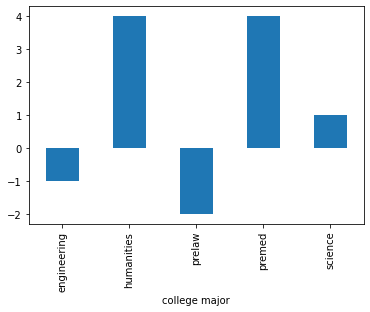

In [ ]:
negpos_df['overall_positivity'] = negpos_df['POSITIVE'] - negpos_df['NEGATIVE']
negpos_df['overall_positivity'].transpose().plot(kind='bar');

# What we've covered
We've covered a lot of ground today!  We've discussed several things:
* Reading in text files via Google Colab and locally via the glob package
* Using lists, list comprehensions, and dictionaries to faciliate coding efforts
* Using primitive data structures to create pandas dataframes
* Appreciating the capabilites of pandas data structures for manipulation of data into desired formats
* Grammar of data manipulation
  - Select (using specific columns): `[]`
  - Filter (removing some parts of the data while keeping others): `.query()`, `.loc()`, `.iloc()`
  - Groupby (doing operations based on a group)
  - Mutate (adding new columns onto the dataframe): `df['new_col']=values`
* Example of HuggingFace sentiment-analysis model inference using demo function
* Converting outputs to dataframes
* Joining (`merge`) dataframes based on a key
* Concatenating dataframes along an axis

# Additional Exercises
1.  Outline the advantages and disadvantages of using lists, dictionaries, and pandas dataframes for manipulating data.
2.  Write your own implementation of selecting the text for inexperienced authors using the author dataframe, lists of text, and the filenames/ids.
3.  We made one big dataframe with the author information alongside the text.  What if you didn't add the text as a column and only used the filename column?  How could you use this in a for loop or list comprehension to read your selected data into a list?  This is applicable for image analysis.
4.  Repeat these exercises using the `.loc[]` method for filtering rather than `.query()`.
5.  The model was very confident (the `score` column) for some predictions and less confident on others.  Suppose we want to identify all of the rows where the score is between 0.4 and 0.6 and change the label in `label` to `NEUTRAL`. Write some code that will implement this.  `.loc` will be your friend here.